In [1]:
# dependencies
import requests
import json
from pymongo import MongoClient
from datetime import datetime
import psycopg2 # a library that allows you to connect to an existing database
from pymongo.mongo_client import MongoClient
import pymongo
import os
import sys

c:\Users\jaypa\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
# set up the request parameters
params = {
  'api_key': 'E372BE0ABCFC453891D3D80F4FA7C537',
  'type': 'bestsellers',
  'amazon_domain': 'amazon.ca',
  'category_id': 'bestsellers_videogames',
  'max_page': '5'
}

In [3]:
# make the http GET request to Rainforest API
bestsellers_videogames = requests.get('https://api.rainforestapi.com/request', params)

In [6]:
# Check if the request was successful
if bestsellers_videogames.status_code == 200:
    data = bestsellers_videogames.json()  # This is your JSON data
    # Define the full path where you want to save the JSON file
    file_path = 'C:/Users/jaypa/OneDrive/Documents/GitHub/Project-3/data_video_games_cleaned/bestsellers_videogames.json'  # Change to your desired path

    # Save the JSON data to a file in the specified location
    with open(file_path, 'w') as f:
        json.dump(data, f, indent=4)
else:
    print("Failed to retrieve data:", bestsellers_videogames.status_code)

In [4]:
# print the JSON response from Rainforest API
print(json.dumps(bestsellers_videogames.json(), indent=4))

{
    "request_info": {
        "success": true,
        "credits_used": 12,
        "credits_remaining": 88,
        "credits_used_this_request": 2
    },
    "request_parameters": {
        "type": "bestsellers",
        "amazon_domain": "amazon.ca",
        "category_id": "bestsellers_videogames",
        "max_page": "5"
    },
    "request_metadata": {
        "created_at": "2024-04-18T22:38:12.437Z",
        "processed_at": "2024-04-18T22:38:21.700Z",
        "total_time_taken": 9.26,
        "pages": [
            {
                "created_at": "2024-04-18T22:38:12.437Z",
                "processed_at": "2024-04-18T22:38:18.643Z",
                "total_time_taken": 6.21,
                "page": 1,
                "amazon_url": "https://www.amazon.ca/Best-Sellers-Computer-Video-Games/zgbs/videogames/ref=zg_bs_nav_0"
            },
            {
                "created_at": "2024-04-18T22:38:18.644Z",
                "processed_at": "2024-04-18T22:38:21.700Z",
                "t

In [8]:
# Load JSON data from the file
json_file_path = 'C:/Users/jaypa/OneDrive/Documents/GitHub/Project-3/data_video_games_cleaned/bestsellers_videogames.json'  # Update this to your actual file path
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

In [9]:


# Extracting the relevant part of the JSON data
bestsellers_data = json_data['bestsellers']

# Create DataFrame from the extracted JSON data
df_bestsellers = pd.json_normalize(bestsellers_data)

# Display the initial structure of the DataFrame
print(df_bestsellers.head())

# Data Cleaning Steps:

# 1. Drop unnecessary columns that are not required for further analysis
columns_to_drop = ['link', 'image', 'current_category.link', 'parent_category.link']
df_bestsellers_cleaned = df_bestsellers.drop(columns=columns_to_drop)

# 2. Convert numeric data from string to appropriate numeric types
df_bestsellers_cleaned['price.value'] = df_bestsellers_cleaned['price.value'].astype(float)
df_bestsellers_cleaned['ratings_total'] = df_bestsellers_cleaned['ratings_total'].fillna(0).astype(int)

# 3. Fill missing values for the 'rating' column with the mean rating
mean_rating = df_bestsellers_cleaned['rating'].mean()
df_bestsellers_cleaned['rating'].fillna(mean_rating, inplace=True)
df_bestsellers_cleaned['rating'] = df_bestsellers_cleaned['rating'].round(1)

# Drop the 'page' column as it contains only null values
df_bestsellers_cleaned.drop(columns='page', inplace=True)

# Final review of the cleaned DataFrame
print(df_bestsellers_cleaned.head())
print(df_bestsellers_cleaned.isnull().sum())  # Checking for any remaining missing values
print(df_bestsellers_cleaned.dtypes)  # Checking the data types of all columns


   rank  position                                              title  \
0     1         1                $25 Xbox Gift Card - [Digital Code]   
1     2         2     DualSense Wireless Controller - Midnight Black   
2     3         3  Meta Quest 2 — Advanced All-In-One Virtual Rea...   
3     4         4  Prince of Persia™: The Lost Crown - Nintendo S...   
4     5         5  Xbox Game Pass Ultimate: 1 Month Membership [D...   

         asin                                               link  \
0  B08M8NR5KM  https://www.amazon.ca/25-Xbox-Gift-Card-Digita...   
1  B0951JZDWT  https://www.amazon.ca/PlayStation-DualSense-Wi...   
2  B09B2YFYYX  https://www.amazon.ca/Oculus-Quest-Advanced-Al...   
3  B0C7SNL397  https://www.amazon.ca/Prince-PersiaTM-Crown-Ni...   
4  B08M8WSRX9  https://www.amazon.ca/Xbox-Game-Pass-Ultimate-...   

                                               image  rating  ratings_total  \
0  https://images-na.ssl-images-amazon.com/images...     4.4         2773.0   


In [10]:
# Save the cleaned DataFrame to a new CSV file for further use
# df_bestsellers_cleaned.to_csv('C:/Users/jaypa/OneDrive/Documents/GitHub/Project-3/data_video_games_cleaned/cleaned_bestsellers_videogames.csv', index=False)

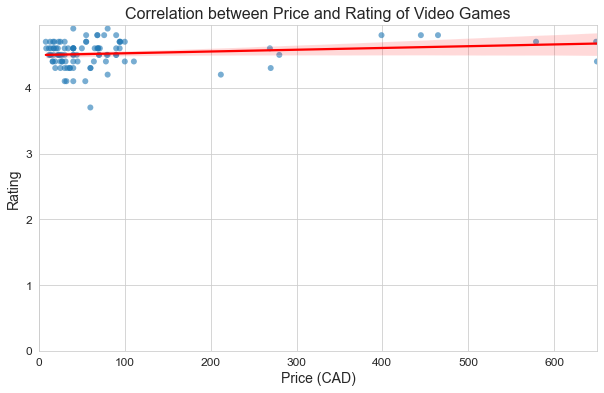

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('C:/Users/jaypa/OneDrive/Documents/GitHub/Project-3/data_video_games_cleaned/cleaned_bestsellers_videogames.csv')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=data, x='price.value', y='rating', alpha=0.6, edgecolor='none')
reg_line = sns.regplot(data=data, x='price.value', y='rating', scatter=False, color='red')

# Enhancing the plot
plt.title('Correlation between Price and Rating of Video Games', fontsize=16)
plt.xlabel('Price (CAD)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(left=0)  # Adjust if necessary
plt.ylim(bottom=0)  # Adjust if necessary

# Display the plot
plt.show()


No relationship between price and rating.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


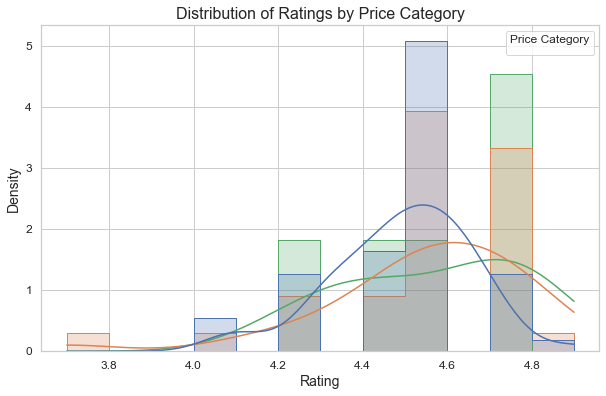

In [2]:
# Define price categories
bins = [0, 50, 100, float('inf')]  # Modify these values based on dataset specifics
labels = ['Low (<= $50)', 'Medium ($51 - $100)', 'High (>$100)']
data['Price Category'] = pd.cut(data['price.value'], bins=bins, labels=labels, include_lowest=True)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
plot = sns.histplot(data=data, x='rating', hue='Price Category', element='step', stat='density', common_norm=False, kde=True)

# Enhancing the plot
plt.title('Distribution of Ratings by Price Category', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.legend(title='Price Category')
plt.show()
